<a href="https://colab.research.google.com/github/Daniel-ASG/IMERSAO_DADOS_ALURA/blob/main/Daniel_Alexandre_da_Silva_Gomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMERSÃO DE DADOS ALURA

####Vamos iniciar carregando algumas bibliotecas e criando o primeiro Dataset.
Como a base de dados é imensa (possui mais de 3GB) criaremos alguns Datasets ao longo da análise a medida que for necessário carregar novos dados

###Importar bibliotecas

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go

###Carregar o dataset

In [ ]:
start_time = time.time() # essa linha dá o start para contar o tempo em que essa célula irá gastar para realizar o carregamento

# a variável "colunas" serve para selecinar quais colunas da fonte iremos utilizar e evitar carregar dados desnecessários para a análise atual
# Podemos saber o que cada coluna significa verificando o dicionário
colunas = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
           'NU_IDADE', 'IN_TREINEIRO', 'TP_SEXO', 
           'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_LC', 'TP_LINGUA',
           'Q001', 'Q002', 'Q006', 'Q025']
                                                                                                                                                #   usecols seleciona as colunas que serão carregadas
dados = pd.read_csv('/content/drive/My Drive/Analise_de_dados/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv', sep=";", encoding='ISO-8859-1', usecols=colunas)

print(f"{(time.time() - start_time):.2f} seconds") # exibe o tempo de carregamento do dataset

40.55 seconds


In [ ]:
dados.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025
0,190001004627,1506807,Santarém,PA,21,M,0,472.9,466.0,497.3,369.1,0,780.0,D,E,B,A
1,190001004628,1504059,Mãe do Rio,PA,16,F,1,358.9,495.4,482.3,416.5,1,600.0,D,E,B,A
2,190001004629,1505502,Paragominas,PA,18,F,0,574.2,538.7,582.6,571.5,0,640.0,H,E,C,B
3,190001004630,1507706,São Sebastião da Boa Vista,PA,23,M,0,NaN,NaN,NaN,NaN,1,NaN,D,D,C,A
4,190001004631,1503903,Juruti,PA,23,M,0,NaN,NaN,NaN,NaN,1,NaN,B,C,C,A


In [ ]:
dados.shape

(5095270, 17)

###Visualizações

####Usando Matplotlib

Text(0.5, 1.0, 'Quantidade de candidatos do ENEM-2019 por UF')

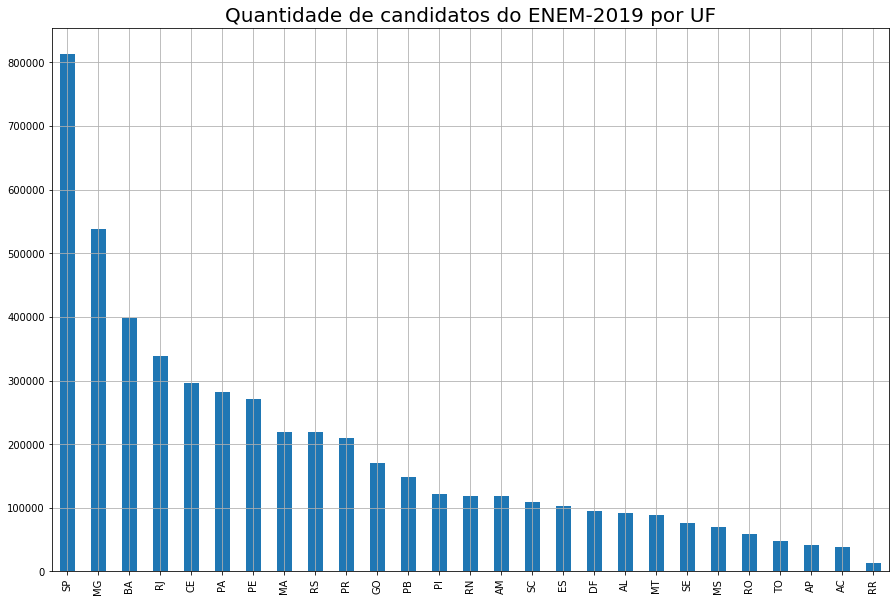

In [ ]:
# dados['SG_UF_RESIDENCIA'] ->      seleção da coluna           
# value_counts()            ->      faz a contagem dos valores que estão na coluna selecionada
dados['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize=(15,10), grid=True)
plt.title('Quantidade de candidatos do ENEM-2019 por UF', fontsize=20)

####Usando plotly.express

In [ ]:
# dados[['SG_UF_RESIDENCIA', 'NU_INSCRICAO']]                                               ->      seleciona apenas as colunas desejadas
# rename(columns={'NU_INSCRICAO': 'QUANTIDADE', 'SG_UF_RESIDENCIA': 'UNIDADE_FEDERATIVA'})  ->      renomeia as colunas escolhidas
# groupby(by=['UNIDADE_FEDERATIVA']).count()                                                ->      agrega os dados pelo critério escolhido e realiza a contagem dos valores desses dados agregados
UF_RESIDENCIA_quant = dados[['SG_UF_RESIDENCIA', 'NU_INSCRICAO']].rename(columns={'NU_INSCRICAO': 'QUANTIDADE', 'SG_UF_RESIDENCIA': 'UNIDADE_FEDERATIVA'}).groupby(by=['UNIDADE_FEDERATIVA']).count()

# cria uma nova coluna no dataframe que será igual à coluna de índices ('UNIDADE_FEDERATIVA')
UF_RESIDENCIA_quant['UNIDADE_FEDERATIVA'] = UF_RESIDENCIA_quant.index

UF_RESIDENCIA_quant = UF_RESIDENCIA_quant.reset_index(drop = True)

# ordena os dados de acordo com os valores da coluna indicada e substitui o dataframe original pelo resultante (equivalente a UF_RESIDENCIA_quant = ...)
UF_RESIDENCIA_quant.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

In [ ]:
UF_RESIDENCIA_quant.head()

,QUANTIDADE,UNIDADE_FEDERATIVA
25,813772,SP
10,538896,MG
4,398095,BA
18,338710,RJ
5,295870,CE


In [ ]:
#            fonte de dados       eixo x                  eixo y          critério de preenchimento de cor   
fig = px.bar(UF_RESIDENCIA_quant, x='UNIDADE_FEDERATIVA', y='QUANTIDADE', color='QUANTIDADE', color_continuous_scale=[(0,"black"), (1,"gray")])
fig.update_layout(height=600, title_text="Quantidade de candidatos do ENEM-2019 por UF", title_font = {"size": 30})
fig.show()

###Fazendo mais análises dos dados

In [ ]:
idade = dados['NU_IDADE'] # seleciona a coluna de idade dos candidatos
fig = px.histogram(idade, x="NU_IDADE", nbins=50, width=800) # gera o histograma das idades
fig.update_layout(title_text="Histograma de idade dos candidatos do ENEM-2019", title_font = {"size": 30})
fig.show()

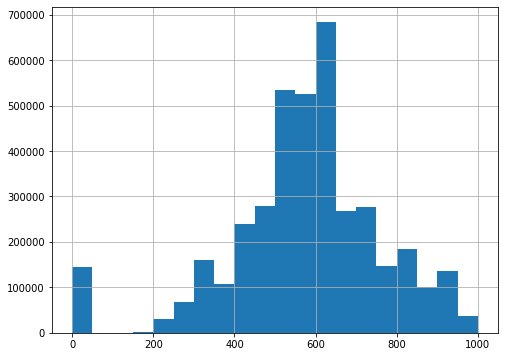

In [ ]:
# Histograma da nota de redação usando matplotlib
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

In [ ]:
# Histograma da nota de redação usando plotly
redacao = dados['NU_NOTA_REDACAO'].dropna() # seleciona a coluna da nota de redação
fig = px.histogram(redacao, x='NU_NOTA_REDACAO', nbins=25, width=600)
fig.show()

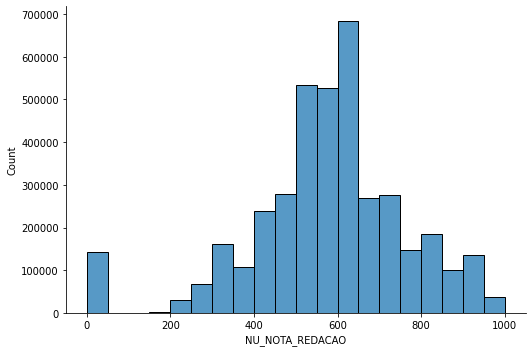

In [ ]:
# Histograma da nota de redação usando seaborn
sns.displot(dados, x='NU_NOTA_REDACAO', bins=20, height=5, aspect=1.5)

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"] # cria uma lista com as provas do ENEM

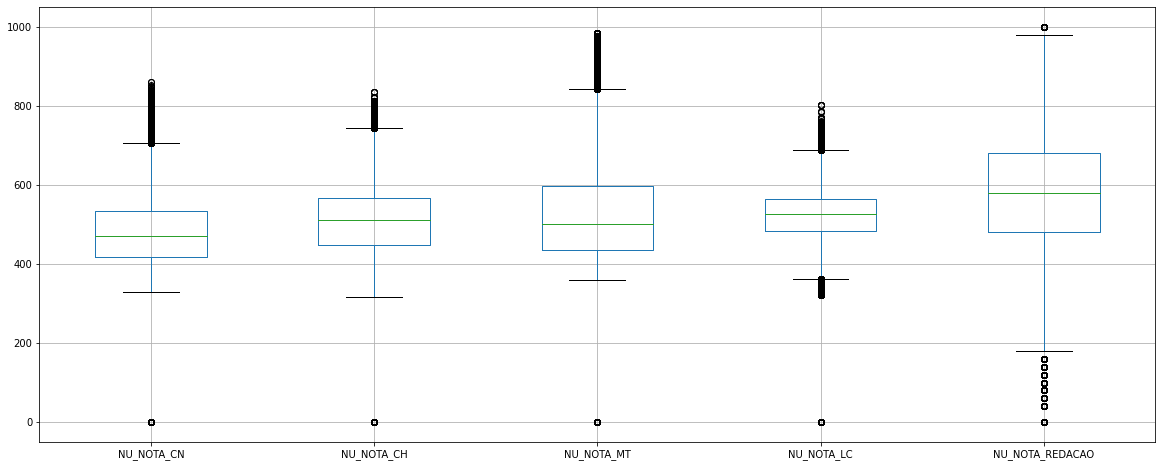

In [ ]:
# Boxplot com as distribuições das provas do ENEM 2019
dados[provas].boxplot(grid=True, figsize= (20,8))

In [ ]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1) # adiciona uma coluna no final do df com a informação 'NU_NOTA_TOTAL'
dados["NU_NOTA_MEDIA"] = dados[provas].mean(axis=1) # adiciona uma coluna no final do df com a informação 'NU_NOTA_MEDIA'

In [ ]:
dados.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NU_NOTA_TOTAL,NU_NOTA_MEDIA
0,190001004627,1506807,Santarém,PA,21,M,0,472.9,466.0,497.3,369.1,0,780.0,D,E,B,A,2585.3,517.06
1,190001004628,1504059,Mãe do Rio,PA,16,F,1,358.9,495.4,482.3,416.5,1,600.0,D,E,B,A,2353.1,470.62
2,190001004629,1505502,Paragominas,PA,18,F,0,574.2,538.7,582.6,571.5,0,640.0,H,E,C,B,2907.0,581.40
3,190001004630,1507706,São Sebastião da Boa Vista,PA,23,M,0,NaN,NaN,NaN,NaN,1,NaN,D,D,C,A,0.0,NaN
4,190001004631,1503903,Juruti,PA,23,M,0,NaN,NaN,NaN,NaN,1,NaN,B,C,C,A,0.0,NaN


In [ ]:
# cria 'media_NotaTotal_sexo' com as informações de sexo e nota média dos candidatos, e exclui o valores com NaN
media_NotaTotal_sexo = dados[['TP_SEXO', 'NU_NOTA_MEDIA']].dropna()
media_NotaTotal_sexo.head()

,TP_SEXO,NU_NOTA_MEDIA
0,M,517.06
1,F,470.62
2,F,581.40
5,M,576.38
6,F,458.66


In [ ]:
# mostra algumas estatísticas das notas dos sexos masculino e feminino
media_NotaTotal_sexo.groupby('TP_SEXO').describe()

NU_NOTA_MEDIA                         ...                        
                count        mean        std  ...     50%     75%     max
TP_SEXO                                       ...                        
F           2340725.0  514.370656  84.047485  ...  506.86  566.00  842.70
M           1590845.0  525.790143  89.641583  ...  522.92  585.24  850.82

[2 rows x 8 columns]

Text(0.5, 1.0, 'Boxplot das notas médias ordenadas pela renda')

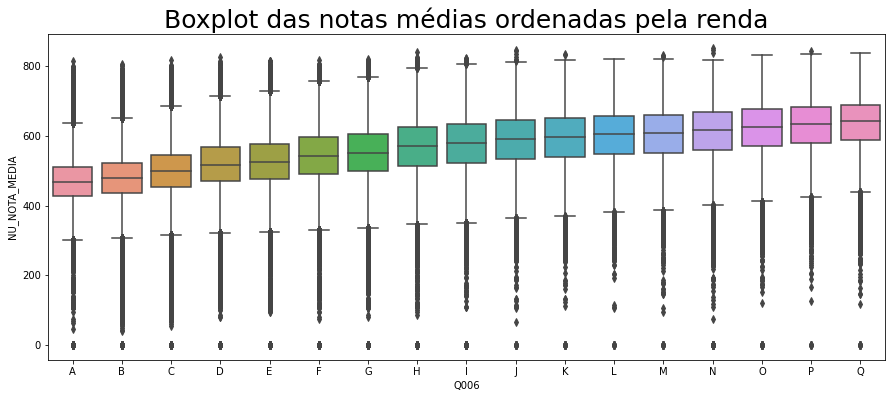

In [ ]:
# cria uma lista com as rendas dos candidatos e depois ordena
renda_ordenada = dados["Q006"].unique()  
renda_ordenada.sort()


plt.figure(figsize=(15, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MEDIA", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas médias ordenadas pela renda", fontsize=25)

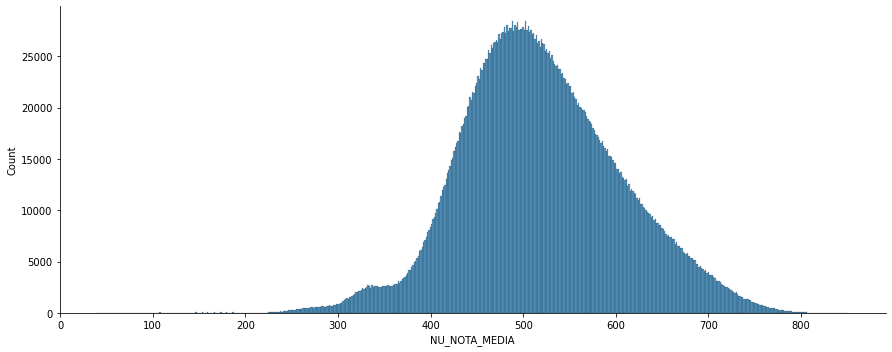

In [ ]:
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.displot(dados.query("NU_NOTA_MEDIA != 0"), x ="NU_NOTA_MEDIA", height=5, aspect=2.5)

### Análise dos DADOS DO QUESTIONÁRIO SOCIOECONÔMICO

Essa análise foi realizada pela @kizzy_terra no canal Programação Dinâmica (www.youtube.com/watch?v=RXbX6giU2vI&list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR&index=6). 
Aqui eu fiz algumas mudanças para tentar obter informações um pouco diferentes para simplificar a análise, mas usando a base do que ela mostrou no vídeo indicado.

In [ ]:
# criar um novo df com os dados das Q001 e Q002 do questionário socioeconômico e a nota média de cada  candidato

colunas_selecionadas = ['NU_INSCRICAO', 'NU_NOTA_MEDIA', 'Q001', 'Q002']
socioeconomico = dados[colunas_selecionadas].dropna() # exclui os candidatos com média igual a zero
socioeconomico.head()

,NU_INSCRICAO,NU_NOTA_MEDIA,Q001,Q002
0,190001004627,517.06,D,E
1,190001004628,470.62,D,E
2,190001004629,581.40,H,E
5,190001004632,576.38,C,C
6,190001004633,458.66,B,B


In [ ]:
# mostra a quantidade de candidatos por cada resposta dada à Q001
socioeconomico[['Q001', 'NU_INSCRICAO']].groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,200822
B,807446
C,549840
D,460560
E,1060270
F,321150
G,201325
H,330157


Text(0.5, 1.0, 'Boxplot das notas médias ordenadas pelo grau de instrução do pai')

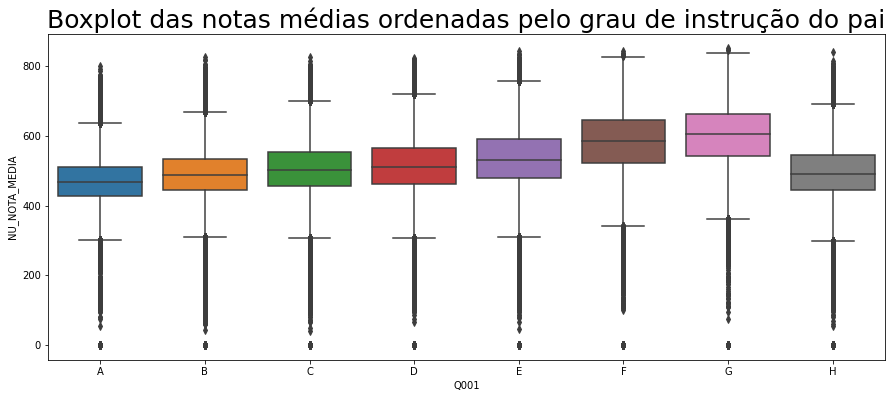

In [ ]:
Q001_ordenada = dados["Q001"].unique()  # seleciona os valores únicos da coluna Q001
Q001_ordenada.sort() # ordena os dados para exibí-los ordenados no boxplot

plt.figure(figsize=(15, 6))
sns.boxplot(x="Q001", y = "NU_NOTA_MEDIA", data = dados, order = Q001_ordenada)
plt.title("Boxplot das notas médias ordenadas pelo grau de instrução do pai", fontsize=25)

Text(0.5, 1.0, 'Boxplot das notas médias ordenadas pelo grau de instrução da mãe')

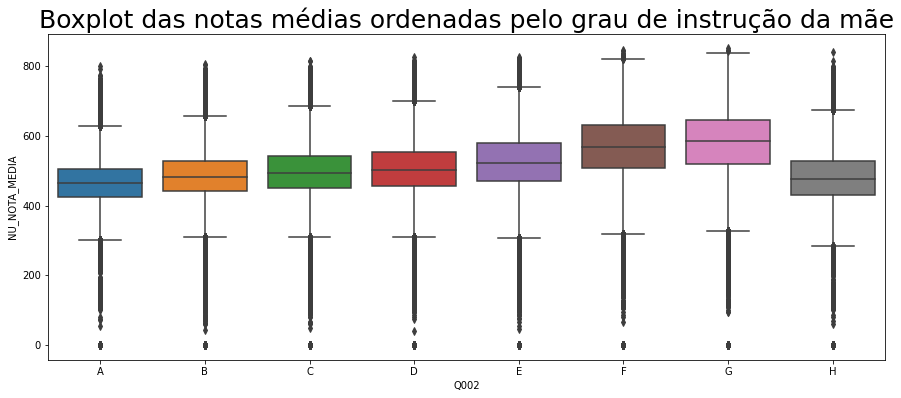

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Q002", y = "NU_NOTA_MEDIA", data = dados, order = Q001_ordenada)
plt.title("Boxplot das notas médias ordenadas pelo grau de instrução da mãe", fontsize=25)

In [ ]:
# cria um dicionário para ajudar na visualização das respostas mais a frente

dicQ001Q002 = {'A': 'Nunca estudou',
               'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
               'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
               'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
               'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
               'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
               'G': 'Completou a Pós-graduação',
               'H': 'Não sei'}

In [ ]:
#seleção de coluna     atribui resp      para        colunas em dados
socioeconomico.Q001 = [dicQ001Q002[resp] for resp in socioeconomico.Q001]
socioeconomico.Q002 = [dicQ001Q002[resp] for resp in socioeconomico.Q002]

In [ ]:
#                                               renomeia Q001 e Q002 para tornar a visualização da tabela mais clara
socioeconomico = socioeconomico.rename(columns={'Q001': 'Grau_de_instrução_do_pai', 'Q002': 'Grau_de_instrução_da_mãe'})
socioeconomico.head()

,NU_INSCRICAO,NU_NOTA_MEDIA,Grau_de_instrução_do_pai,Grau_de_instrução_da_mãe
0,190001004627,517.06,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
1,190001004628,470.62,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."
2,190001004629,581.40,Não sei,"Completou o Ensino Médio, mas não completou a ..."
5,190001004632,576.38,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
6,190001004633,458.66,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...


In [ ]:
#               seleciona as duas colunas                            agrupa pela instrução do pai      faz a contagem de candidatos para cada resposta e ordena          renomeia a coluna
socioeconomico[['NU_INSCRICAO', 'Grau_de_instrução_do_pai']].groupby('Grau_de_instrução_do_pai').count().sort_values(by='NU_INSCRICAO', ascending=False).rename(columns={'NU_INSCRICAO': 'QUANTIDADE'})

,QUANTIDADE
Grau_de_instrução_do_pai,
"Completou o Ensino Médio, mas não completou a Faculdade",1060270
Não completou a 4ª série/5º ano do Ensino Fundamental,807446
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549840
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460560
Não sei,330157
"Completou a Faculdade, mas não completou a Pós-graduação",321150
Completou a Pós-graduação,201325
Nunca estudou,200822


In [ ]:
socioeconomico[['NU_INSCRICAO', 'Grau_de_instrução_da_mãe']].groupby('Grau_de_instrução_da_mãe').count().sort_values(by='NU_INSCRICAO', ascending=False).rename(columns={'NU_INSCRICAO': 'QUANTIDADE'})

,QUANTIDADE
Grau_de_instrução_da_mãe,
"Completou o Ensino Médio, mas não completou a Faculdade",1305828
Não completou a 4ª série/5º ano do Ensino Fundamental,593828
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",508328
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",505097
"Completou a Faculdade, mas não completou a Pós-graduação",434860
Completou a Pós-graduação,346708
Nunca estudou,131220
Não sei,105701


In [ ]:
# adiciona a coluna 'SG_UF_RESIDENCIA' ao df socioeconomico
socioeconomico['SG_UF_RESIDENCIA'] = dados.SG_UF_RESIDENCIA

In [ ]:
socioeconomico.head()

,NU_INSCRICAO,NU_NOTA_MEDIA,Grau_de_instrução_do_pai,Grau_de_instrução_da_mãe,SG_UF_RESIDENCIA
0,190001004627,517.06,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",PA
1,190001004628,470.62,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",PA
2,190001004629,581.40,Não sei,"Completou o Ensino Médio, mas não completou a ...",PA
5,190001004632,576.38,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...",PA
6,190001004633,458.66,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,PA


In [ ]:
# refaz a análise anterior aplicada ao Estado da Paraíba, mas ao invés de mostrar a quantidade de candidatos, mostra a média de acordo com a resposta

socioeconomico_PB_Q001 = socioeconomico[['NU_NOTA_MEDIA', 'Grau_de_instrução_do_pai']].where(socioeconomico.SG_UF_RESIDENCIA == 'PB').groupby('Grau_de_instrução_do_pai').mean().sort_values(by='NU_NOTA_MEDIA', ascending=False)
socioeconomico_PB_Q001

,NU_NOTA_MEDIA
Grau_de_instrução_do_pai,
Completou a Pós-graduação,599.691046
"Completou a Faculdade, mas não completou a Pós-graduação",580.804790
"Completou o Ensino Médio, mas não completou a Faculdade",533.257304
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",512.476009
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",503.349425
Não sei,491.906363
Não completou a 4ª série/5º ano do Ensino Fundamental,487.927062
Nunca estudou,473.547294


In [ ]:
socioeconomico_PB_Q002 = socioeconomico.filter(items=['NU_NOTA_MEDIA', 'Grau_de_instrução_da_mãe']).where(socioeconomico.SG_UF_RESIDENCIA == 'PB').groupby('Grau_de_instrução_da_mãe').mean().sort_values(by='NU_NOTA_MEDIA', ascending=False)
socioeconomico_PB_Q002

,NU_NOTA_MEDIA
Grau_de_instrução_da_mãe,
Completou a Pós-graduação,577.953954
"Completou a Faculdade, mas não completou a Pós-graduação",564.835709
"Completou o Ensino Médio, mas não completou a Faculdade",522.732592
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",503.057506
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.268834
Não completou a 4ª série/5º ano do Ensino Fundamental,481.705388
Não sei,478.470271
Nunca estudou,466.068358


### Análise das notas por município (Você deve selecionar a sigla da UF desejada para obter os dados de interesse)

In [ ]:
UF = input ('Digite a UF de interesse: ').strip().upper() # recebe uma string pelo teclado para selecionar o Estado de interesse
while UF not in dados['SG_UF_RESIDENCIA'].unique(): # faz a verificação se foi digitada uma sigla de Estado válida
    UF = input ('Você digitou a sigla errada. Digite a UF: ').strip().upper() # Em caso de erro, solicita nova inserção de UF
Enem_UFselecionada = dados.query('SG_UF_RESIDENCIA == @UF').dropna() # cria um novo df com os dados apenas da UF selecionada
Enem_UFselecionada.head()

Digite a UF de interesse: rn


,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NU_NOTA_TOTAL,NU_NOTA_MEDIA
78651,190001083280,2408102,Natal,RN,30,M,0,641.3,688.4,621.3,733.9,0,900.0,D,E,Q,B,3584.9,716.98
138595,190001143224,2402501,Carnaubais,RN,18,M,0,479.5,518.2,530.9,444.5,0,520.0,E,B,G,B,2493.1,498.62
166567,190001171200,2408003,Mossoró,RN,16,M,1,357.1,514.0,527.6,413.7,0,800.0,B,B,B,A,2612.4,522.48
241452,190001246085,2408003,Mossoró,RN,20,F,0,398.3,460.5,528.4,501.3,1,700.0,E,E,C,B,2588.5,517.70
255674,190001260307,2408003,Mossoró,RN,20,M,0,441.6,553.4,413.9,529.8,0,600.0,D,D,C,B,2538.7,507.74


In [ ]:
# seleciona apenas as colunas de notas para exibir as informações estatísticas das notas dos candidatos do estado selecionado
Enem_UFselecionada[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA
count,90383.000000,90383.000000,90383.000000,90383.000000,90383.000000,90383.000000
mean,475.589424,505.096930,518.833630,518.508284,586.318445,520.869342
std,75.373368,80.214549,62.712797,106.549783,177.985516,81.417078
min,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000
25%,416.200000,445.800000,480.700000,432.600000,500.000000,464.180000
50%,467.900000,507.400000,523.200000,496.700000,580.000000,513.200000
75%,529.450000,563.800000,563.200000,592.100000,680.000000,573.060000
max,847.800000,793.200000,731.100000,985.000000,1000.000000,822.640000


In [ ]:
# do df Enem_UFselecionada filtramos apenas os dados de sexo e nota média 
notas_UFselecionada_sexo = Enem_UFselecionada[['TP_SEXO', 'NU_NOTA_MEDIA']]
notas_UFselecionada_sexo.groupby('TP_SEXO').describe() # agrupamos por sexo e mostramos as estatísticas da seleção referente ao Estado selecionado

NU_NOTA_MEDIA                         ...                        
                count        mean        std  ...     50%     75%     max
TP_SEXO                                       ...                        
F             51925.0  512.803247  79.337564  ...  503.28  560.64  805.84
M             38458.0  531.759977  82.908452  ...  527.61  587.27  822.64

[2 rows x 8 columns]

In [ ]:
# verifica as notas das provas por município da UF selecionada
notas_UFselecionada_municipio = Enem_UFselecionada[['NO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA']]
#                                      agrupamos por município   tiramos a média       ordenamos pelo valor da média geral
notas_UFselecionada_municipio.groupby('NO_MUNICIPIO_RESIDENCIA').mean().sort_values(by='NU_NOTA_MEDIA', ascending=False).head(10)

In [ ]:
nota_media_UF = dados[['SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA']].groupby('SG_UF_RESIDENCIA').mean().sort_values(by='NU_NOTA_MEDIA', ascending=False)

Text(0.5, 1.0, 'Notas dos candidatos do ENEM/2019 por UF')

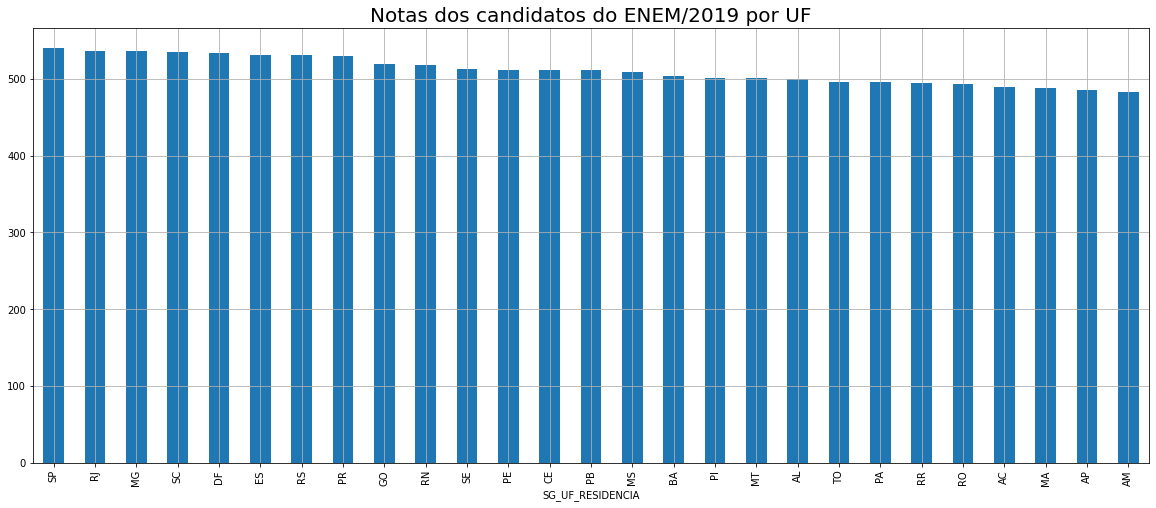

In [ ]:
nota_media_UF['NU_NOTA_MEDIA'].plot.bar(figsize=(20,8), grid=True)
plt.title('Notas dos candidatos do ENEM/2019 por UF', fontsize=20)

### Análise das notas do ENEM/2019 com relação ao IDHM

#### Desta vez vamos precisar de outras duas novas fontes de dados. Iremos fazer o download em:

Essa análise também foi realizada pela @kizzy_terra no canal Programação Dinâmica (https://www.youtube.com/watch?v=AugVEge2C9E&list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR&index=11 e https://www.youtube.com/watch?v=W5RySbHukVs&list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR&index=13).

*  Base de dados do Censo Demográfico (1991, 2000 e 2010) disponíveis no endereço (http://www.atlasbrasil.org.br/acervo/biblioteca) 


> (https://1drv.ms/u/s!AuwEBHxVU0YSgbNpGJXSZvUd7K47FQ?e=ZhrV8y)



*   Arquivos SQL, CSV e JSON contendo o código IBGE, nome do município, capital, código UF, UF, estado, latitude e longitude de todos (ou quase todos) os municípios brasileiros. Total de 5.570 registros (https://github.com/kelvins/Municipios-Brasileiros).

> https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv




In [ ]:
colunas = ['ANO', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']
atlasHumano = pd.read_excel("/content/drive/My Drive/Analise_de_dados/microdados_enem_2019/Atlas 2013_municipal, estadual e Brasil.xlsx", sheet_name='MUN 91-00-10', usecols= colunas)
atlasHumano = atlasHumano.query('ANO == "2010"')
atlasHumano.head()

,ANO,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
11130,2010,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
11131,2010,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
11132,2010,1100031,CABIXI,0.650,0.559,0.757,0.650
11133,2010,1100049,CACOAL,0.718,0.620,0.821,0.727
11134,2010,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688


In [ ]:
municipios = pd.read_csv("/content/drive/My Drive/Analise_de_dados/microdados_enem_2019/municipios.csv", sep=",")
municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [ ]:
colunas = ['CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA']
notas_municipio = dados[colunas].dropna()
notas_municipio = notas_municipio.groupby('CO_MUNICIPIO_RESIDENCIA').mean()
notas_municipio.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA
CO_MUNICIPIO_RESIDENCIA,,,,,,
1100015,467.092819,495.192553,506.729255,503.024468,562.287234,506.865266
1100023,463.640456,494.021582,509.741273,499.166337,535.417025,500.397334
1100031,454.453125,476.479688,490.650000,497.443750,503.437500,484.492812
1100049,469.204832,496.843997,511.780710,510.874488,546.793558,507.099517
1100056,468.381164,491.672945,508.293493,505.175685,556.301370,505.964932


In [ ]:
Enem_IDHM = pd.merge(notas_municipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])
Enem_IDHM.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA,ANO,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,467.092819,495.192553,506.729255,503.024468,562.287234,506.865266,2010.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,463.640456,494.021582,509.741273,499.166337,535.417025,500.397334,2010.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716
2,454.453125,476.479688,490.650000,497.443750,503.437500,484.492812,2010.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650
3,469.204832,496.843997,511.780710,510.874488,546.793558,507.099517,2010.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727
4,468.381164,491.672945,508.293493,505.175685,556.301370,505.964932,2010.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688


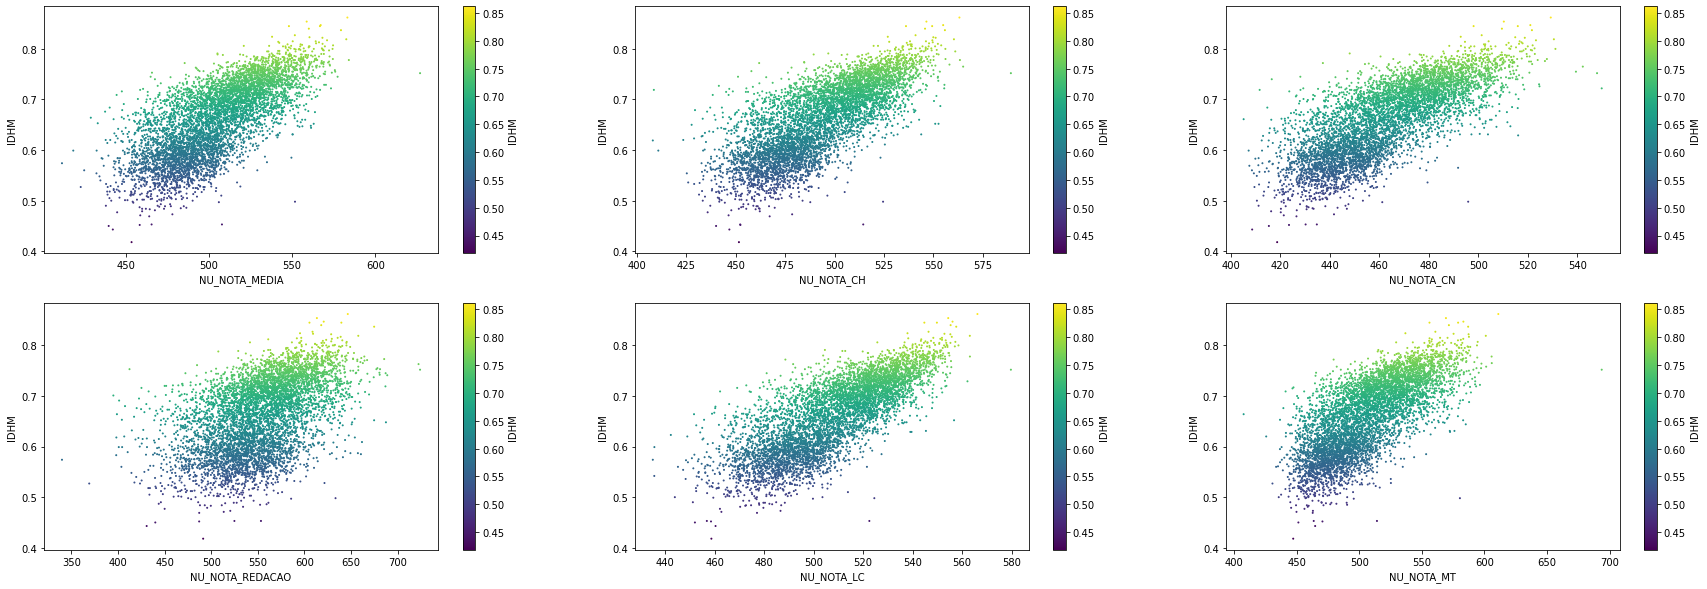

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(30,10))
Enem_IDHM.plot.scatter('NU_NOTA_MEDIA', 'IDHM', ax = ax[0, 0], s=1, c='IDHM', colormap='viridis')
Enem_IDHM.plot.scatter('NU_NOTA_REDACAO', 'IDHM', ax = ax[1, 0], s=1, c='IDHM', colormap='viridis')
Enem_IDHM.plot.scatter('NU_NOTA_CN', 'IDHM', ax = ax[0, 2], s=1, c='IDHM', colormap='viridis')
Enem_IDHM.plot.scatter('NU_NOTA_CH', 'IDHM', ax = ax[0, 1], s=1, c='IDHM', colormap='viridis')
Enem_IDHM.plot.scatter('NU_NOTA_LC', 'IDHM', ax = ax[1, 1], s=1, c='IDHM', colormap='viridis')
Enem_IDHM.plot.scatter('NU_NOTA_MT', 'IDHM', ax = ax[1, 2], s=1, c='IDHM', colormap='viridis')

In [ ]:
media_geral = Enem_IDHM.NU_NOTA_MEDIA.mean()
media_IDHM = Enem_IDHM.IDHM.mean()

In [ ]:
IDHM_Municipio = Enem_IDHM.IDHM
nota_Municipio = Enem_IDHM.NU_NOTA_MEDIA

quadrante_1 = (IDHM_Municipio < media_IDHM) & (nota_Municipio < media_geral)
quadrante_2 = (IDHM_Municipio > media_IDHM) & (nota_Municipio < media_geral)
quadrante_3 = (IDHM_Municipio > media_IDHM) & (nota_Municipio > media_geral)
quadrante_4 = (IDHM_Municipio < media_IDHM) & (nota_Municipio > media_geral)

Enem_IDHM_1 = Enem_IDHM[quadrante_1]
Enem_IDHM_2 = Enem_IDHM[quadrante_2]
Enem_IDHM_3 = Enem_IDHM[quadrante_3]
Enem_IDHM_4 = Enem_IDHM[quadrante_4]

quadrante 1: 39.08%, baixo IDHM, baixa nota
quadrante 2: 11.94%, alto IDHM, baixa nota
quadrante 3: 40.54%, alto IDHM, alta nota
quadrante 4: 8.35%, baixo IDHM, alta nota


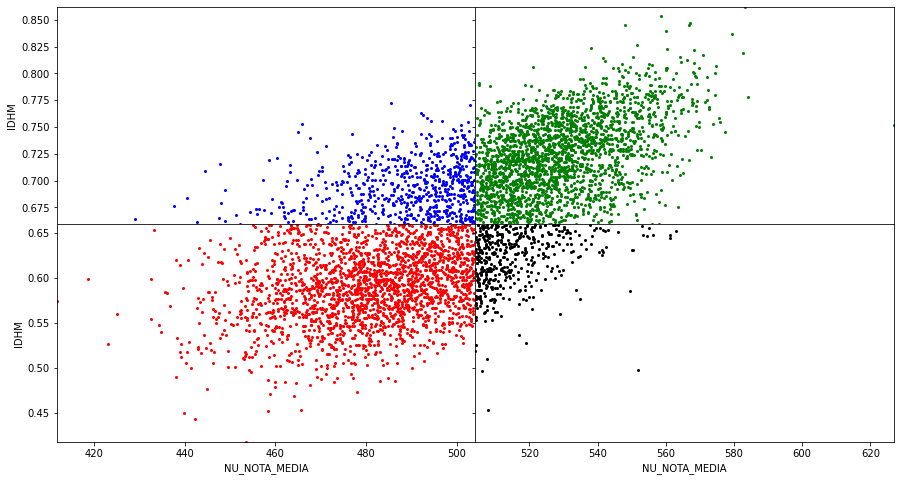

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex = 'col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)

min_media = Enem_IDHM.NU_NOTA_MEDIA.min()
max_media = Enem_IDHM.NU_NOTA_MEDIA.max()
min_IDHM = Enem_IDHM.IDHM.min()
max_IDHM = Enem_IDHM.IDHM.max()

# media_geral
# media_IDHM

print(f'quadrante 1: {100*len(Enem_IDHM_1.IDHM)/len(IDHM_Municipio):.2f}%, baixo IDHM, baixa nota')
Enem_IDHM_1.plot.scatter('NU_NOTA_MEDIA', 'IDHM', color='red', s=4, ax = ax[1, 0], xlim = [min_media, media_geral], ylim = [min_IDHM, media_IDHM]) 
print(f'quadrante 2: {100*len(Enem_IDHM_2.IDHM)/len(IDHM_Municipio):.2f}%, alto IDHM, baixa nota')
Enem_IDHM_2.plot.scatter('NU_NOTA_MEDIA', 'IDHM', color='blue', s=4,  ax = ax[0, 0], xlim = [min_media, media_geral], ylim = [media_IDHM, max_IDHM])
print(f'quadrante 3: {100*len(Enem_IDHM_3.IDHM)/len(IDHM_Municipio):.2f}%, alto IDHM, alta nota')
Enem_IDHM_3.plot.scatter('NU_NOTA_MEDIA', 'IDHM', color='green', s=4,  ax = ax[0, 1], xlim = [media_geral, max_media], ylim = [media_IDHM, max_IDHM])
print(f'quadrante 4: {100*len(Enem_IDHM_4.IDHM)/len(IDHM_Municipio):.2f}%, baixo IDHM, alta nota')
Enem_IDHM_4.plot.scatter('NU_NOTA_MEDIA', 'IDHM', color='black', s=4,  ax = ax[1, 1], xlim = [media_geral, max_media], ylim = [min_IDHM, media_IDHM])

In [ ]:
enem_idhm_municipios = pd.merge(Enem_IDHM, municipios, how='left', left_on=['Codmun7'], right_on=['codigo_ibge'])
enem_idhm_municipios.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_MEDIA,ANO,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,467.092819,495.192553,506.729255,503.024468,562.287234,506.865266,2010.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657,1100015.0,Alta Floresta D'Oeste,-11.92830,-61.9953,0.0,11.0
1,463.640456,494.021582,509.741273,499.166337,535.417025,500.397334,2010.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716,1100023.0,Ariquemes,-9.90571,-63.0325,0.0,11.0
2,454.453125,476.479688,490.650000,497.443750,503.437500,484.492812,2010.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650,1100031.0,Cabixi,-13.49450,-60.5520,0.0,11.0
3,469.204832,496.843997,511.780710,510.874488,546.793558,507.099517,2010.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727,1100049.0,Cacoal,-11.43430,-61.4562,0.0,11.0
4,468.381164,491.672945,508.293493,505.175685,556.301370,505.964932,2010.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688,1100056.0,Cerejeiras,-13.18700,-60.8168,0.0,11.0


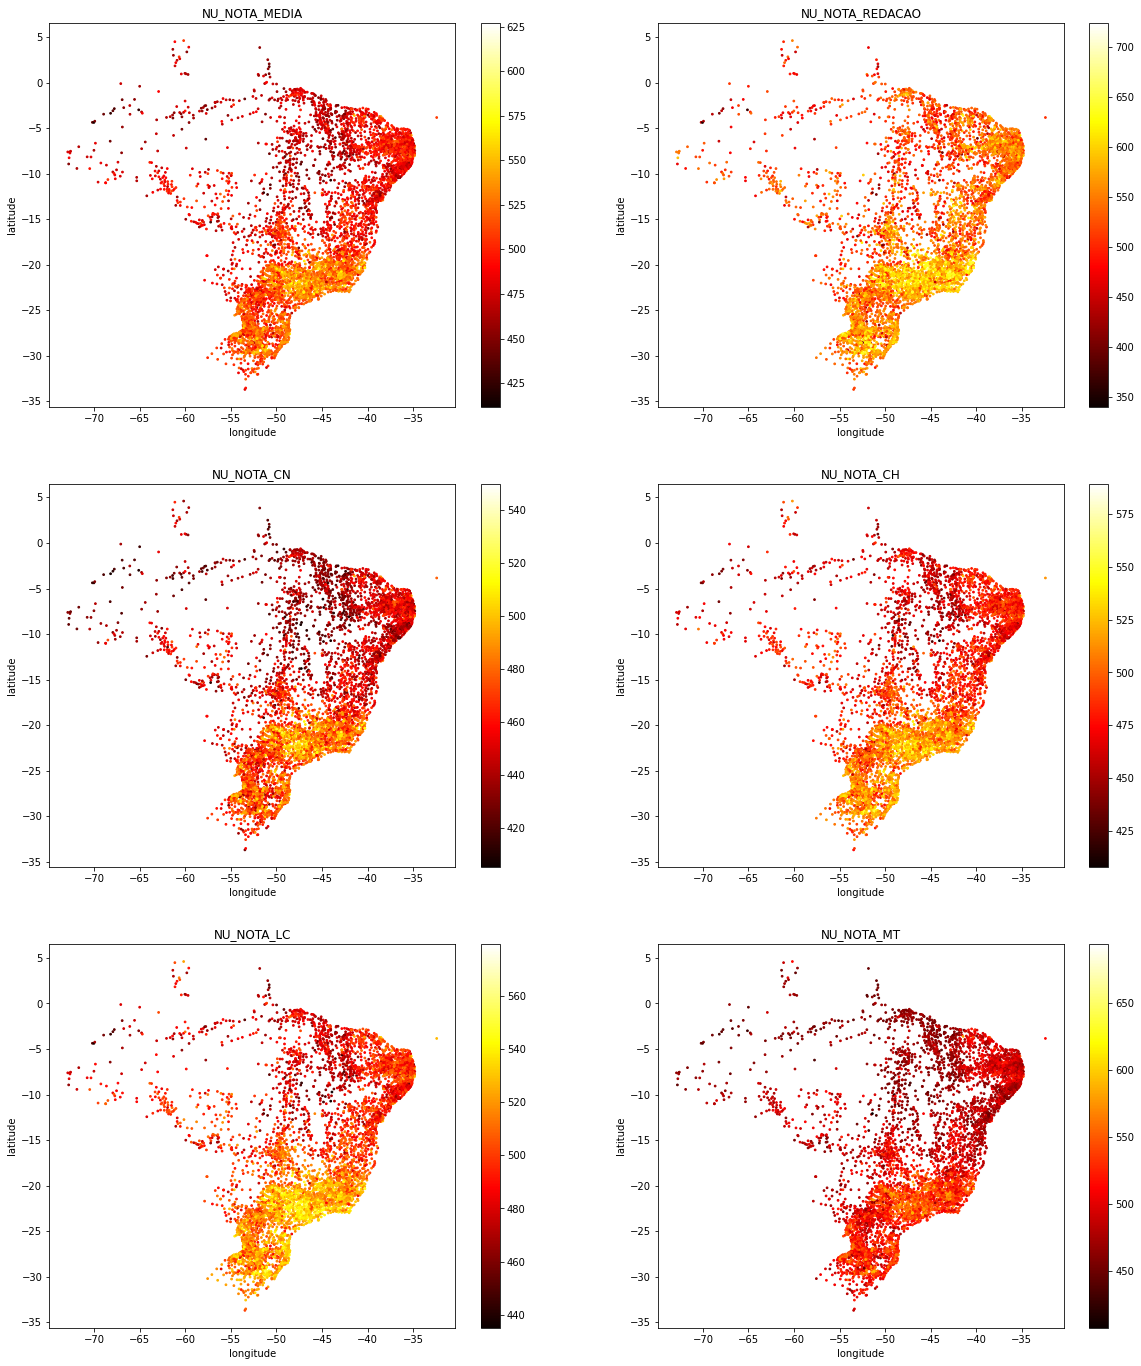

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,24))

enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_MEDIA'], cmap='hot', title='NU_NOTA_MEDIA', ax=ax[0,0], s=3)
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_REDACAO'], cmap='hot', title='NU_NOTA_REDACAO', ax=ax[0,1], s=3)
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CN'], cmap='hot', title='NU_NOTA_CN', ax=ax[1,0], s=3)
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_CH'], cmap='hot', title='NU_NOTA_CH', ax=ax[1,1], s=3)
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_LC'], cmap='hot', title='NU_NOTA_LC', ax=ax[2,0], s=3)
enem_idhm_municipios.plot.scatter(y='latitude', x='longitude', c=enem_idhm_municipios['NU_NOTA_MT'], cmap='hot', title='NU_NOTA_MT', ax=ax[2,1], s=3)